In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style='darkgrid')

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Exploratory Data Analysis

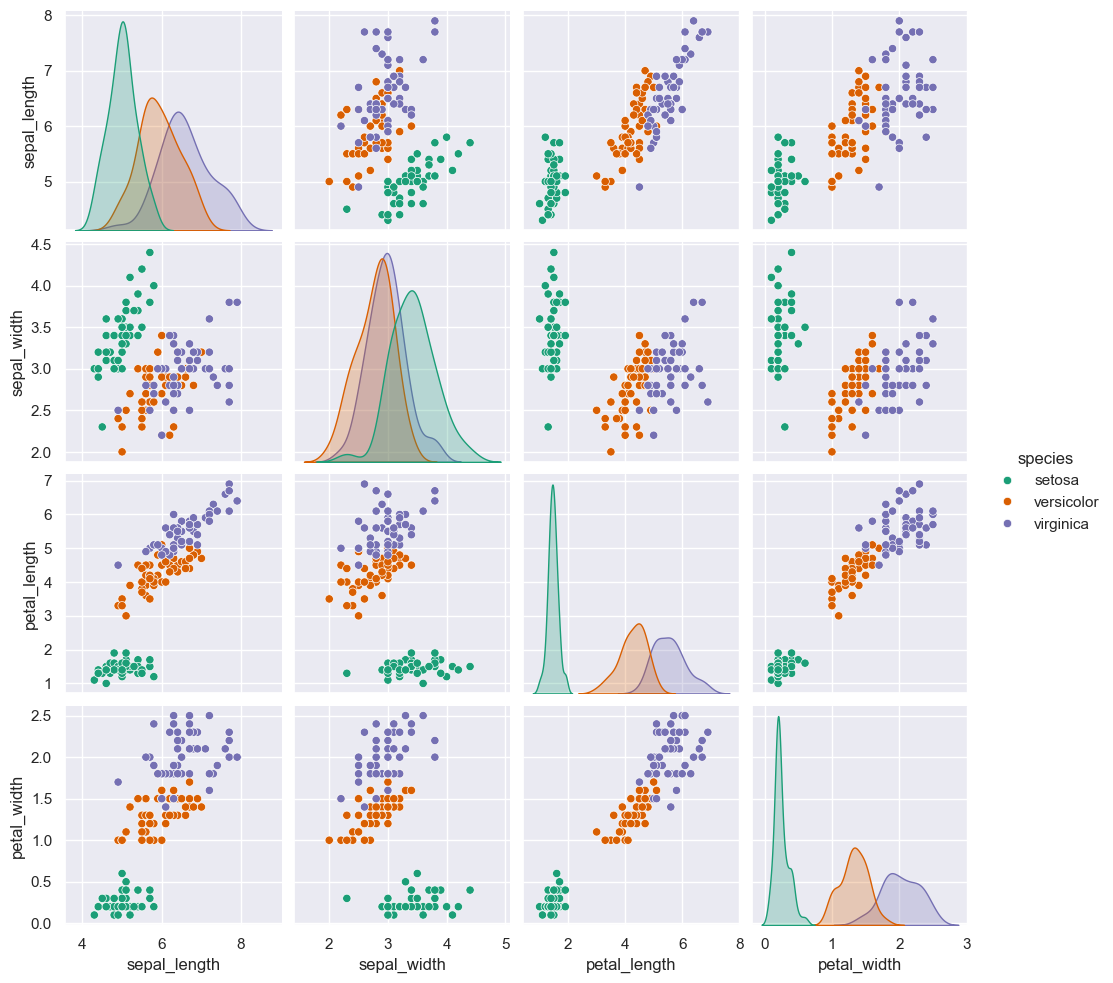

In [5]:
sns.pairplot(iris,hue='species',palette='Dark2')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

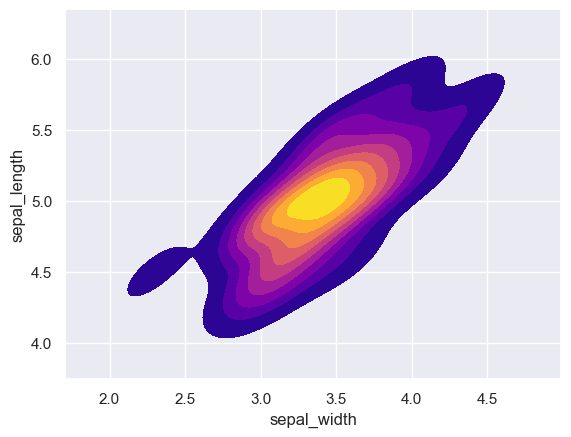

In [6]:
setosa = iris[iris['species']=='setosa']

sns.kdeplot(setosa,x='sepal_width',y='sepal_length',cmap='plasma',fill=True)

#### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = iris.drop('species',axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Train a Model

In [9]:
from sklearn.svm import SVC

In [10]:
svc_model = SVC()

In [11]:
svc_model.fit(X_train,y_train)

SVC()

#### Model Evaluation

In [12]:
predictions = svc_model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
print(confusion_matrix(y_test,predictions))
print('/n')
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
/n
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
from sklearn.model_selection import GridSearchCV

#### Gridsearch

In [16]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [17]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [18]:
grid_predictions = grid.predict(X_test)

In [19]:
print(confusion_matrix(y_test,grid_predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

